# 1er paso: Crear conexi√≥n de datos con MySQL e Importar librer√≠as

In [42]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conect√≥ a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexi√≥n a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se cre√≥ el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()

Se conect√≥ a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4084256081.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexi√≥n a MySQL cerrada.
Se cre√≥ el dataframe "Tourist_Accommodation"
Se cre√≥ el dataframe "Tourist_Accommodation10032025"
Se cre√≥ el dataframe "Tourist_Accommodation17032025"


In [43]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]

# 2do paso: Exploraci√≥n inicial

In [45]:
# se carga como df la TABLA M√ÅS RECIENTE
df = Tourist_Accommodation17032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                   None     Private room   
1                         CÔøΩrmenes                 Latina     Private room   
2                      San Vicente          Casco Antiguo  Entire home/apt   
3  l'Antiga Esquerra de l'Eixample               Eixample     Private room   
4                            Quart                   None     Private room   

   accommodates bathrooms bedrooms  beds  \
0             2         2        1   1.0   
1             1         1        1   1.0   
2             4         1        2   2.0   
3             2         2        1   1.0   
4             5         1        2   5.0   

                                      amenities_list  price  minimum_nights  \
0  TV,Internet,Wifi,Air conditioning,Elevator,Buz...  400.0               3   
1  TV,Internet,Wifi,Air conditioning,Kitchen,Free...  170.0               4   
2  TV,Internet,Wifi,Air conditioning,Wheelchair a...  990.0               2   
3  TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...  400.0               2   
4  Wifi,Pool,Free parking on premises,Breakfast,P...  900.0               1   

   maximum_nights has_availability  availability_30  availability_60  \
0             365        VERDADERO                7               20   
1              40        VERDADERO                0                0   
2             120        VERDADERO               26               31   
3             730        VERDADERO                9               23   
4             180        VERDADERO                0               19   

   availability_90  availability_365  number_of_reviews first_review_date  \
0               40               130                 78        02/01/2010   
1                0               162                 33        10/10/2014   
2               31               270                148        05/01/2011   
3               49               300                292        13/03/2012   
4               49               312                 36        08/07/2011   

  last_review_date  review_scores_rating  review_scores_accuracy  \
0       05/09/2017                 970.0                   100.0   
1       15/07/2018                 920.0                    90.0   
2       22/07/2019                 980.0                   100.0   
3       04/01/2020                 940.0                   100.0   
4       08/08/2018                 970.0                   100.0   

   review_scores_cleanliness  review_scores_checkin  \
0                      100.0                  100.0   
1                       90.0                  100.0   
2                      100.0                  100.0   
3                       90.0                  100.0   
4                      100.0                  100.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                        100.0                   100.0                100.0   
1                        100.0                    80.0                 90.0   
2                        100.0                   100.0                100.0   
3                        100

In [46]:
# Tama√±o
df.shape

(18000, 35)

In [47]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 18000 non-null  int64  
 1   name                         17996 non-null  object 
 2   description                  17743 non-null  object 
 3   host_id                      18000 non-null  int64  
 4   neighbourhood_name           18000 non-null  object 
 5   neighbourhood_district       10941 non-null  object 
 6   room_type                    18000 non-null  object 
 7   accommodates                 18000 non-null  int64  
 8   bathrooms                    17866 non-null  object 
 9   bedrooms                     17872 non-null  object 
 10  beds                         17929 non-null  float64
 11  amenities_list               17968 non-null  object 
 12  price                        17552 non-null  float64
 13  minimum_nights  

# 3er paso: Correcci√≥n y limpieza del dataset

Imputaciones y conversiones

In [48]:
# Conversi√≥n a num√©rico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
# Caracter√≠sticas num√©ricas del alojamiento
# Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 ba√±o y aloja a al menos a 1 persona.
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

# Cambio de tipo de dato a integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

# Conversi√≥n a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)
df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# Conversi√≥n a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

# Imputaciones
# Columnas num√©ricas mejor con mediana ya que los outliers nos pueden afectar. 
df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
df["maximum_nights"].fillna(df["maximum_nights"].median(), inplace=True)

# Reemplazar los nulos en 'price' con la mediana del 'price' seg√∫n 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

# Rellenar los Naan de review_score_location con la media
df["review_scores_location"].fillna(df["review_scores_location"].mean(), inplace=True)

# intentamos llenar los nulos de scores_rating con la media de (city, neighbourhood_name)
df['review_scores_rating'] = df.groupby(['city', 'neighbourhood_name'])['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))
# como nos siguen quedando nulos en scores_rating vamos a tratar de rellenar los NaN con la media de la ciudad
df['review_scores_rating'] = df.groupby('city')['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))

# Imputaci√≥n de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.
df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Desconocido")
)
# Columnas de texto
df["name"].fillna("Desconocido", inplace=True)
df["description"].fillna("No disponible", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin informaci√≥n")
df.isnull().sum()

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\4099904585.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fa

apartment_id                       0
name                               0
description                        0
host_id                            0
neighbourhood_name                 0
neighbourhood_district             0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities_list                     0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review_date              12426
last_review_date               12499
review_scores_rating               0
review_scores_accuracy          4861
review_scores_cleanliness       4850
review_scores_checkin           4873
r

Duplicados

In [49]:
df.duplicated().sum()

np.int64(8000)

In [50]:
registros_totales = len(df)
duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El n√∫mero de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El n√∫mero de apartment_id duplicados es: 8350


In [51]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]
# Mostrar las filas duplicadas
duplicados_filas.head()

apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
9         73683                 Sagrada Familia area for 12 people   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
9  An ideal location for a big group, two apartme...   135703   

                   neighbourhood_name neighbourhood_district        room_type  \
0                              Centro            Desconocido     Private room   
1                            CÔøΩrmenes                 Latina     Private room   
2                         San Vicente          Casco Antiguo  Entire home/apt   
3     l'Antiga Esquerra de l'Eixample               Eixample     Private room   
9  el Camp d'en Grassot i GrÔøΩcia Nova                 GrÔøΩcia  Entire home/apt   

   accommodates  bathrooms  bedrooms  beds  \
0             2          2         1     2   
1             1          1         1     1   
2             4          1         2     4   
3             2          2         1     2   
9            12          2         4    12   

                                      amenities_list   price  minimum_nights  \
0  TV,Internet,Wifi,Air conditioning,Elevator,Buz...   400.0               3   
1  TV,Internet,Wifi,Air conditioning,Kitchen,Free...   170.0               4   
2  TV,Internet,Wifi,Air conditioning,Wheelchair a...   990.0               2   
3  TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...   400.0               2   
9  TV,Cable TV,Internet,Wifi,Air conditioning,Kit...  3000.0               2   

   maximum_nights  has_availability  availability_30  availability_60  \
0             365              True                7               20   
1              40              True                0                0   
2             120              True               26               31   
3             730              True                9               23   
9              60              True                8               12   

   availability_90  availability_365  number_of_reviews first_review_date  \
0               40               130                 78        2010-02-01   
1                0               162                 33        2014-10-10   
2               31               270                148        2011-05-01   
3               49               300                292               NaT   
9               23               296                120        2011-04-06   

  last_review_date  review_scores_rating  review_scores_accuracy  \
0       2017-05-09                 970.0                   100.0   
1              NaT                 920.0                    90.0   
2              NaT                 980.0                   100.0   
3       2020-04-01                 940.0                   100.0   
9              NaT                 920.0                    90.0   

   review_scores_cleanliness  review_scores_checkin  \
0                      100.0                  100.0   
1                       90.0                  100.0   
2                      100.0                  100.0   
3                       90.0                  100.0   
9                       90.0                  100.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                        100.0                   100.0                100.0   
1                        100.0                    80.0                 90.0   
2                        100.0                   100.0       

In [52]:
# Se decide borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida c√≥mo los tratar√° en su an√°lisis.
df = df.drop_duplicates()
df.shape

(10000, 35)

In [53]:
def imputaci√≥n_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado m√°s antiguo y completa sus valores faltantes 
    con los del m√°s reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (m√°s antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "√≠ndice del registro antiguo": earliest_index,
                    "√≠ndice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputaci√≥n_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [54]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El n√∫mero de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El n√∫mero de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observaci√≥n de la misma propiedad. 

In [55]:
df.to_csv("S3_EDA_Marketing_def.csv", index=False)

TABLAS DE FRECUENCIA

In [56]:
# Tablas de frecuencia para las categor√≠as seleccionadas
categorical_columns = ['city', 'neighbourhood_name', 'review_scores_location', 
                       'review_scores_rating', 'minimum_nights', 'maximum_nights']

# Generar y mostrar tablas de frecuencia para cada categor√≠a
for col in categorical_columns:
    frequency_table = df[col].value_counts().reset_index()
    frequency_table.columns = [col, 'count']
    
    # Mostrar la tabla de frecuencia
    print(f"\nFrecuencia de {col}:")
    print(frequency_table.head(10))  # Muestra las 10 categor√≠as m√°s frecuentes



Frecuencia de city:
        city  count
0  barcelona   2825
1     madrid   2202
2   mallorca   1644
3     girona   1533
4   valencia    528
5    sevilla    524
6     malaga    520
7    menorca    224

Frecuencia de neighbourhood_name:
                      neighbourhood_name  count
0                                 Centro    336
1                 la Dreta de l'Eixample    312
2                            Embajadores    286
3                      Palma de Mallorca    212
4                               el Raval    212
5                            Universidad    207
6                               PollenÔøΩa    198
7  Sant Pere, Santa Caterina i la Ribera    188
8                                AlcÔøΩdia    178
9                                Palacio    175

Frecuencia de review_scores_location:
   review_scores_location  count
0              100.000000   4775
1               95.511121   2724
2               90.000000   1919
3               80.000000    461
4               70.000000   

-An√°lisis de review_scores_location<br>
1 Valores muy concentrados en puntuaciones altas: El 85% de los datos est√°n en 100, 95.5 y 90. Esto sugiere que la mayor√≠a de los alojamientos tienen ubicaciones muy bien valoradas, lo cual podr√≠a ser una distorsi√≥n en la percepci√≥n o falta de variabilidad en las rese√±as.<br>
2 Falta de una distribuci√≥n normal: En un sistema de puntuaci√≥n m√°s realista, esperar√≠amos una distribuci√≥n m√°s balanceada. Aqu√≠ parece que la mayor√≠a de los usuarios dan calificaciones altas, mientras que hay muy pocas propiedades con puntuaciones de 70 o menos.<br>
3 Valores intermedios casi inexistentes. Pr√°cticamente no hay puntuaciones entre 80 y 70. Esto sugiere que los usuarios tienden a calificar en extremos: muy bien (100-90) o muy mal (70-60).<br>

-An√°lisis de City:<br>
1 Barcelona es la ciudad con m√°s registros (2825), seguida de Madrid (2202).Representan la mayor parte del dataset, lo que puede influir en los an√°lisis si no se balancea la cantidad de datos por ciudad.Esto puede indicar que estas ciudades tienen m√°s oferta de alojamientos o m√°s datos disponibles en la plataforma.<br>
2 Ciudades con menos registros: Menorca (224) y M√°laga (520).

-An√°lisis de los barrios (neighbourhood_name)<br>
1 Los barrios m√°s frecuentes tienen muchas m√°s propiedades listadas. Ejemplo: Centro, la Dreta de l‚ÄôEixample, Embajadores, el Raval tienen una alta concentraci√≥n de alojamientos. Esto podr√≠a indicar zonas tur√≠sticas con mayor oferta o mayor demanda de alquileres.<br>
2 Algunos barrios solo tienen 1 alojamiento listado. Ejemplo: Terrades, Osor, La Buhaira, MASSARROJOS. Podr√≠an ser zonas residenciales con poca oferta tur√≠stica.<br>
3 Distribuci√≥n desigual de barrios: Hay barrios con cientos de alojamientos y otros con muy pocos.<br>

-An√°lisis de review_scores_rating<br>
1 La puntuaci√≥n m√°s com√∫n es 1000.0: Esto indica que muchos alojamientos tienen la m√°xima puntuaci√≥n posible. Puede reflejar alta satisfacci√≥n o un sesgo en las calificaciones, donde los hu√©spedes solo dejan rese√±as si est√°n muy satisfechos.<br>
2 Existen puntuaciones muy poco comunes: Valores como 932.72, 921.53, 848.18 aparecen solo una vez en todo el dataset.<br>
3 Algunos alojamientos tienen puntuaciones extremadamente bajas: El m√≠nimo es 200, lo que indica propiedades con experiencias muy negativas.<br>

-An√°lisis de minimum_nights (Noches m√≠nimas permitidas)<br>
1 El valor m√°s com√∫n es 1 noche: M√°s de 3000 alojamientos permiten reservas de una sola noche. Esto sugiere que la mayor√≠a de los alojamientos no imponen restricciones de estancia m√≠nima.<br>
2 Hay algunos valores extremadamente altos (1125 noches). Algunos alojamientos requieren una estancia m√≠nima de varios meses o a√±os.<br>

-An√°lisis de maximum_nights (Noches m√°ximas permitidas)<br>
1 El valor m√°s frecuente es 1125 noches: Parece ser un valor predeterminado en la plataforma, ya que casi todos los alojamientos tienen este n√∫mero. Probablemente los anfitriones no establecen un m√°ximo y la plataforma asigna un n√∫mero alto por defecto.<br>
2 Valores intermedios de 365, 30 y 60 noches tambi√©n son frecuentes: 365 noches sugiere que algunos alojamientos permiten estancias largas (hasta un a√±o). 30 y 60 noches pueden representar opciones populares para alquileres de medio plazo.<br>
3 Existen valores extremadamente bajos e inusuales. Hay registros con m√°ximo de 7 noches, lo que indica que algunos alojamientos solo aceptan reservas cortas.<br>


OUTLIERS DE M√ÅXIMAS Y M√çNIMAS RESERVAS POR NOCHE

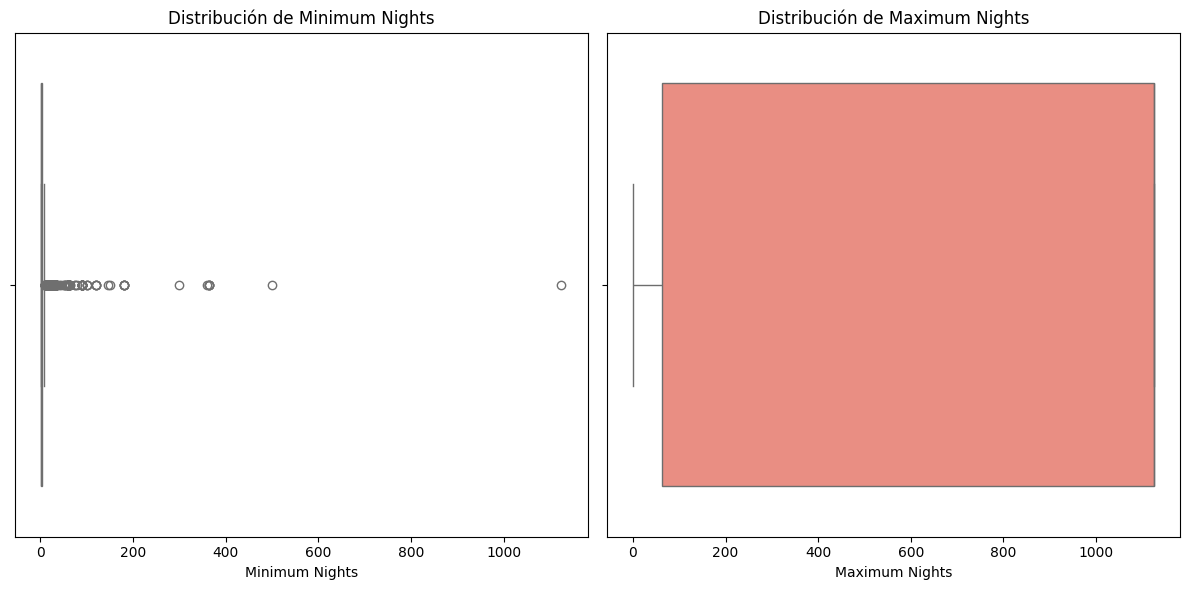

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tama√±o de la figura
plt.figure(figsize=(12, 6))

# Crear dos subgr√°ficos (boxplots) para visualizar los outliers en 'minimum_nights' y 'maximum_nights'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['minimum_nights'], color='skyblue')
plt.title("Distribuci√≥n de Minimum Nights")
plt.xlabel("Minimum Nights")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['maximum_nights'], color='salmon')
plt.title("Distribuci√≥n de Maximum Nights")
plt.xlabel("Maximum Nights")

# Ajustar el espacio entre gr√°ficos
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


Observaciones clave:<br>

1Ô∏è‚É£ minimum_nights tiene una gran cantidad de outliers. La mayor√≠a de los valores se concentran en la parte baja del eje X (cercanos a 1-10 noches). Sin embargo, hay muchos valores extremos dispersos, incluyendo algunos por encima de 600 y hasta 1000 noches.<br>
Esto confirma que algunos anfitriones establecen valores muy altos, posiblemente por error o sin intenci√≥n de aceptar reservas cortas.<br>

2Ô∏è‚É£ maximum_nights est√° dominado por un valor extremo. En la caja del boxplot de maximum_nights, se observa que todo el gr√°fico est√° ocupado por un valor enorme, lo que indica que la mayor√≠a de los alojamientos tienen un n√∫mero de noches m√°ximo extremadamente alto o ilimitado. El hecho de que el boxplot est√© completamente expandido sugiere que no hay un l√≠mite realista en muchos casos.<br>

3Ô∏è‚É£ Posible sesgo en los datos La presencia de valores tan altos y extremos en minimum_nights puede distorsionar el an√°lisis si no se filtran correctamente.Los alquileres de m√°s de 31 d√≠as son considerados como alquiler de larga duraci√≥n y no alquiler tur√≠stico.<br>

In [58]:
percentiles = df["minimum_nights"].quantile([0.90, 0.95, 0.99, 1])
print("Percentiles de minimum_nights:")
print(percentiles)

Percentiles de minimum_nights:
0.90       7.0
0.95      30.0
0.99      32.0
1.00    1125.0
Name: minimum_nights, dtype: float64


Solo el 5% de los datos tienen valores mayores a 30 noches. Estos alojamientos suelen estar destinados a alquileres de largo plazo y distorsionan el an√°lisis de optimizaci√≥n para estancias tur√≠sticas. Seg√∫n la Ley de Arrendamientos Urbanos - LAU en Espa√±a,los contratos inferiores a 31 d√≠as son considerados Estancias Tur√≠sticas. Para ello se necesisa una liciencia tur√≠stica y tienen una actividad econ√≥mica y financiera diferente que los alquileres de larga duraci√≥n. Decidimos trabajar con estancias tur√≠sticas solamente.

In [59]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El n√∫mero de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El n√∫mero de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observaci√≥n de la misma propiedad. 

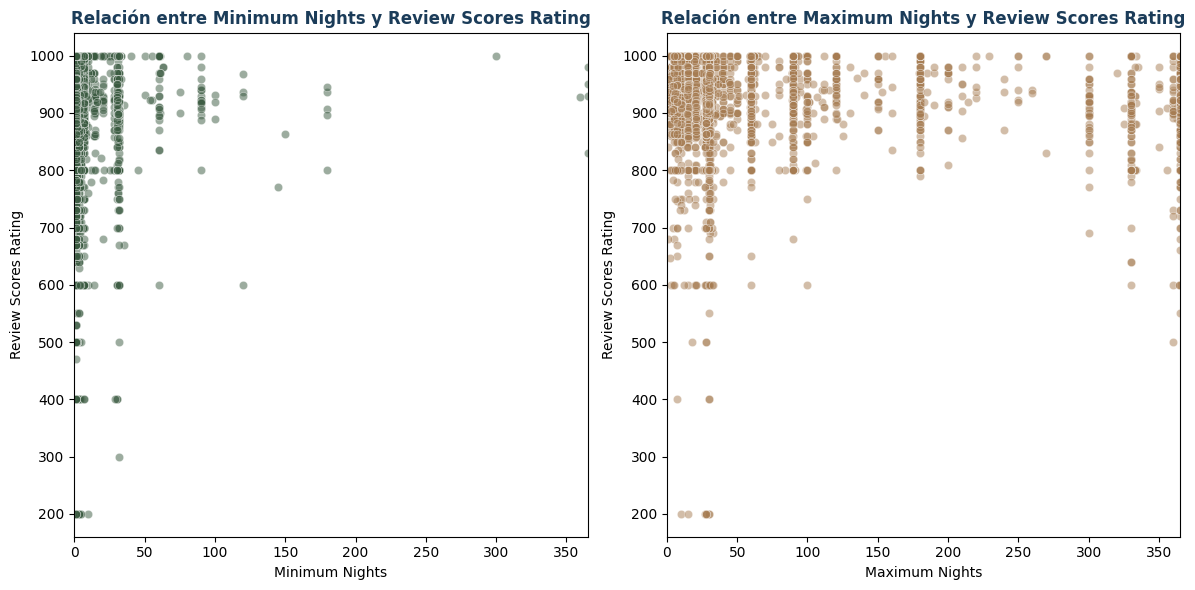

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurar el tama√±o de la figura
plt.figure(figsize=(12, 6))

# Gr√°fico de dispersi√≥n para 'minimum_nights' vs 'review_scores_rating'
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['minimum_nights'], y=df['review_scores_rating'], alpha=0.5, color=paleta[1])
plt.xlim(0, 365)  # Limitar el eje x a un a√±o para evitar valores extremos
plt.title("Relaci√≥n entre Minimum Nights y Review Scores Rating", fontsize=12, fontweight="bold", color=paleta[0])
plt.xlabel("Minimum Nights", fontsize=10, color="black")
plt.ylabel("Review Scores Rating", fontsize=10, color="black")

# Gr√°fico de dispersi√≥n para 'maximum_nights' vs 'review_scores_rating'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['maximum_nights'], y=df['review_scores_rating'], alpha=0.5, color=paleta[5])
plt.xlim(0, 365)  # Limitar el eje x a un a√±o
plt.title("Relaci√≥n entre Maximum Nights y Review Scores Rating", fontsize=12, fontweight="bold", color=paleta[0])
plt.xlabel("Maximum Nights", fontsize=10, color="black")
plt.ylabel("Review Scores Rating", fontsize=10, color="black")

# Ajustar dise√±o
plt.tight_layout()

# Mostrar gr√°ficos
plt.show()

# Calcular la correlaci√≥n entre noches m√≠nimas/m√°ximas y review_scores_rating
correlation_minimum = df[['minimum_nights', 'review_scores_rating']].corr().iloc[0,1]
correlation_maximum = df[['maximum_nights', 'review_scores_rating']].corr().iloc[0,1]

# Crear un DataFrame con los resultados de correlaci√≥n
correlation_results = pd.DataFrame({
    "Variable": ["Minimum Nights", "Maximum Nights"],
    "Correlaci√≥n con Review Scores Rating": [correlation_minimum, correlation_maximum]
})



Observaciones clave del gr√°fico de dispersi√≥n:
1Ô∏è‚É£ No hay una relaci√≥n clara entre minimum_nights y review_scores_rating. Los datos est√°n dispersos, sin una tendencia clara.
Incluso con noches m√≠nimas altas, algunos alojamientos tienen buenas calificaciones.
Esto sugiere que minimum_nights no es un factor determinante en la puntuaci√≥n de los alojamientos.
2Ô∏è‚É£ maximum_nights tampoco muestra una relaci√≥n evidente con review_scores_rating. Muchos valores altos de maximum_nights parecen configuraciones arbitrarias.
No se observa un patr√≥n en que m√°s noches m√°ximas signifiquen mejores o peores calificaciones.

In [86]:
from scipy.stats import spearmanr, kendalltau
import pandas as pd

# Filtrar para evitar valores extremos que puedan distorsionar la correlaci√≥n
df_filtered = df[(df['minimum_nights'] <= 365)]

# Calcular correlaci√≥n de Spearman
spearman_corr, spearman_p = spearmanr(df_filtered['minimum_nights'], df_filtered['review_scores_rating'])

# Calcular correlaci√≥n de Kendall
kendall_corr, kendall_p = kendalltau(df_filtered['minimum_nights'], df_filtered['review_scores_rating'])

# Crear un DataFrame con los resultados
correlation_results = pd.DataFrame({
    "M√©todo": ["Spearman", "Kendall"],
    "Correlaci√≥n": [spearman_corr, kendall_corr],
    "P-valor": [spearman_p, kendall_p]
})

# Mostrar la tabla con los resultados de correlaci√≥n
print("Correlaci√≥n entre Minimum Nights y Review Scores Rating:")
print(correlation_results)


Correlaci√≥n entre Minimum Nights y Review Scores Rating:
     M√©todo  Correlaci√≥n       P-valor
0  Spearman     0.064714  9.375401e-11
1   Kendall     0.048466  6.714296e-11


La correlaci√≥n es baja (~0.06 para Spearman y ~0.05 para Kendall), lo que indica que minimum_nights tiene muy poca influencia en review_scores_rating.
El p-valor es muy bajo, lo que sugiere que el resultado es estad√≠sticamente significativo, pero la magnitud de la relaci√≥n sigue siendo d√©bil.

In [62]:
from scipy.stats import spearmanr, kendalltau
import pandas as pd

# Filtrar valores extremos para evitar distorsi√≥n en los c√°lculos
df_filtered = df[(df['minimum_nights'] <= 365) & (df['maximum_nights'] <= 365)]

# Definir pares de variables a analizar
correlation_pairs = [
    ("minimum_nights", "maximum_nights"),
    ("minimum_nights", "number_of_reviews"),
    ("maximum_nights", "review_scores_location"),
    ("minimum_nights", "price"),
    ("maximum_nights", "price")
]

# Calcular correlaciones
correlation_results = []
for var1, var2 in correlation_pairs:
    spearman_corr, spearman_p = spearmanr(df_filtered[var1], df_filtered[var2])
    kendall_corr, kendall_p = kendalltau(df_filtered[var1], df_filtered[var2])
    
    correlation_results.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Spearman Correlaci√≥n": spearman_corr,
        "Spearman P-valor": spearman_p,
        "Kendall Correlaci√≥n": kendall_corr,
        "Kendall P-valor": kendall_p
    })

# Convertir los resultados en un DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Mostrar la tabla con los resultados de correlaci√≥n
print("Correlaciones entre m√≠nimo/m√°ximo de noches y otras variables:")
print(correlation_df)


Correlaciones entre m√≠nimo/m√°ximo de noches y otras variables:
       Variable 1              Variable 2  Spearman Correlaci√≥n  \
0  minimum_nights          maximum_nights              0.328690   
1  minimum_nights       number_of_reviews             -0.132353   
2  maximum_nights  review_scores_location             -0.016056   
3  minimum_nights                   price              0.120648   
4  maximum_nights                   price              0.169503   

   Spearman P-valor  Kendall Correlaci√≥n  Kendall P-valor  
0      6.155200e-88             0.251313     5.946004e-88  
1      5.464407e-15            -0.102304     7.486732e-16  
2      3.451531e-01            -0.012570     3.472364e-01  
3      1.085822e-12             0.092271     9.790457e-14  
4      1.036293e-23             0.117812     9.358900e-24  


An√°lisis de las correlaciones entre minimum_nights, maximum_nights y otras variables

1Ô∏è‚É£ Correlaci√≥n entre minimum_nights y maximum_nights (0.328 - Spearman, 0.251 - Kendall). Hay una correlaci√≥n positiva moderada, lo que indica que cuando los anfitriones establecen un m√≠nimo de noches alto, tambi√©n suelen establecer un m√°ximo alto.
Sin embargo, la correlaci√≥n no es muy fuerte, lo que sugiere que en muchos casos, las restricciones de estancia pueden no estar directamente relacionadas.

2Ô∏è‚É£ minimum_nights y number_of_reviews (-0.132 - Spearman, -0.102 - Kendall). Existe una correlaci√≥n negativa d√©bil pero significativa, lo que indica que los alojamientos con una estancia m√≠nima m√°s alta tienden a recibir menos rese√±as.
Esto tiene sentido: si el m√≠nimo de noches es alto, menos personas pueden reservar el alojamiento, lo que reduce la cantidad de rese√±as disponibles.

3Ô∏è‚É£ maximum_nights y review_scores_location (-0.016 - Spearman, -0.012 - Kendall). No hay una correlaci√≥n significativa entre el n√∫mero m√°ximo de noches y la puntuaci√≥n de ubicaci√≥n. Esto confirma que el m√°ximo de noches no afecta la percepci√≥n de la ubicaci√≥n.

4Ô∏è‚É£ minimum_nights y price (0.120 - Spearman, 0.092 - Kendall). Existe una correlaci√≥n positiva d√©bil, lo que indica que los alojamientos con una estancia m√≠nima m√°s alta tienden a tener precios m√°s elevados. Es posible que los anfitriones con propiedades m√°s exclusivas o caras quieran evitar reservas cortas y prefieran clientes que se queden m√°s tiempo.

5Ô∏è‚É£ maximum_nights y price (0.169 - Spearman, 0.118 - Kendall). La correlaci√≥n es m√°s alta que con minimum_nights, pero sigue siendo baja.
Esto puede indicar que algunos alojamientos con precios m√°s altos permiten estancias m√°s largas, pero la relaci√≥n no es muy fuerte.

In [63]:
df.shape

(10000, 35)

# 4to paso: Pregunta de Negocio a Departamento de Marketing

### ¬øQu√© ciudades y barrios muestran un potencial de optimizaci√≥n m√°s grande considerando el n√∫mero de rese√±as, la puntuaci√≥n de la zona y la disponibilidad m√≠nima y m√°xima de noches*?

* (*)Tras un an√°lisis exhaustivo del dataset, se llega a la conclusi√≥n de que el m√°ximo y m√≠nimo de noches no siempre reflejan una estrategia real. 
Estas variables no son un factor de mejora sino una restricci√≥n establecida por el anfitri√≥n seg√∫n su modelo de negocio, capacidad operativa o preferencia.
No es un factor que pueda modificarse globalmente para aumentar la calidad o competitividad del barrio, ya que depende de cada propietario.
La optimizaci√≥n de una ciudad o barrio deber√≠a centrarse en variables m√°s significativas como review_scores_location y review_scores_rating que s√≠ afectan directamente la percepci√≥n del alojamiento.


In [64]:
#Crea una nueva columna llamada mean_review_score_by_city_neighbourhood.En esta columna, coloca la media de review_scores_rating para cada combinaci√≥n de city y neighbourhood_name.
# Esto te permite comparar cada apartamento con la media de su barrio.
df['mean_review_score_by_city_neighbourhood'] = df.groupby(['city', 'neighbourhood_name'])['review_scores_rating'].transform('mean') 

In [65]:
# A√±adir una columna que indique si el apartamento esta infravalorado respecto al resto de apartamentos del barrio-ciudad
# Marca con 1 los apartamentos que est√°n por debajo de la media del barrio.
df['apartamento_mejorable'] = (df['review_scores_rating'] < df['mean_review_score_by_city_neighbourhood']).astype(int)

In [66]:
# Crear una tabla que sume 'apartamento_mejorable' agrupando por 'city' y 'neighbourhood_name'
valores_por_debajo_de_la_media = df.groupby(['city', 'neighbourhood_name'])['apartamento_mejorable'].sum().reset_index()

# Ordenar la tabla de mayor a menor seg√∫n la suma de 'apartamento_mejorable'
valores_por_debajo_de_la_media = valores_por_debajo_de_la_media.sort_values(by='apartamento_mejorable', ascending=False)

# Mostrar la tabla
print(valores_por_debajo_de_la_media)

# Ahora sabemos d√≥nde hay m√°s alojamientos con baja puntuaci√≥n relativa.

          city neighbourhood_name  apartamento_mejorable
251     madrid        Embajadores                    134
327     malaga             Centro                    119
336   mallorca            AlcÔøΩdia                    114
367   mallorca  Palma de Mallorca                    108
161     girona              Roses                    102
..         ...                ...                    ...
516   valencia           SANT PAU                      0
515   valencia     SANT MARCEL.LI                      0
1    barcelona        Can Peguera                      0
521   valencia           TRINITAT                      0
522   valencia      VARA DE QUART                      0

[523 rows x 3 columns]


In [67]:
# Crear una tabla ordenando 'city' y 'neighbourhood_name' por 'review_scores_location' de menor a mayor
location_score_sorted = df.groupby(['city', 'neighbourhood_name'])['review_scores_location'].mean().reset_index()

# Ordenar la tabla de menor a mayor seg√∫n 'review_scores_location'
location_score_sorted = location_score_sorted.sort_values(by='review_scores_location', ascending=True)

# Mostrar la tabla
print(location_score_sorted)
#Ordena los barrios con peor valoraci√≥n de ubicaci√≥n.

          city neighbourhood_name  review_scores_location
205     girona          VilajuÔøΩga                    60.0
418    sevilla      La Bachillera                    70.0
138     girona               Osor                    70.0
430    sevilla            Palmete                    80.0
422    sevilla           La Oliva                    80.0
..         ...                ...                     ...
82      girona            Bordils                   100.0
73      girona               Amer                   100.0
515   valencia     SANT MARCEL.LI                   100.0
516   valencia           SANT PAU                   100.0
1    barcelona        Can Peguera                   100.0

[523 rows x 3 columns]


In [78]:
# Unificar las tablas location_score_sorted y valores_por_debajo_de_la_media cruzando por 'city' y 'neighbourhood_name'
merged_table = location_score_sorted.merge(valores_por_debajo_de_la_media, on=['city', 'neighbourhood_name'], how='inner')

# Mostrar la tabla unificada
print(merged_table.head(25))

#  Ahora disponemos de una tabla final con: review_scores_location (qu√© tan bien valorada es la ubicaci√≥n) y apartamento_mejorable (cu√°ntos apartamentos tienen baja valoraci√≥n en el barrio).


         city           neighbourhood_name  review_scores_location  \
0      girona                    VilajuÔøΩga               60.000000   
1     sevilla                La Bachillera               70.000000   
2      girona                         Osor               70.000000   
3     sevilla                      Palmete               80.000000   
4     sevilla                     La Oliva               80.000000   
5     sevilla    Prado, Parque MarÔøΩa Luisa               80.000000   
6     sevilla  La Palmilla, Doctor MaraÔøΩÔøΩn               80.000000   
7    valencia                   EL CALVARI               80.000000   
8      girona                          Ger               80.000000   
9     sevilla                      Tablada               80.000000   
10     girona                 Sant Ferriol               80.000000   
11    sevilla        Cruz Roja, Capuchinos               80.000000   
12  barcelona                     Vallbona               80.000000   
13     giron

Apartamentos Mejorables En Zonas Con Baja Puntuaci√≥n

In [69]:
# Filtrar los barrios donde la puntuaci√≥n de ubicaci√≥n est√° por debajo de la media
mean_location_score = merged_table['review_scores_location'].mean()

# Filtrar los barrios donde el n√∫mero de apartamentos mejorables est√° por encima de la media
mean_apartamentos_mejorables = merged_table['apartamento_mejorable'].mean()

# Seleccionar solo los barrios que cumplen ambas condiciones
df_critico = merged_table[
    (merged_table['review_scores_location'] < mean_location_score) &
    (merged_table['apartamento_mejorable'] > mean_apartamentos_mejorables)
]

# Mostrar la tabla con los barrios cr√≠ticos
print(df_critico)


          city                 neighbourhood_name  review_scores_location  \
18   barcelona              el BesÔøΩs i el Maresme               84.437278   
29   barcelona                          el Carmel               86.239154   
38      madrid                          San Diego               87.904274   
101     malaga                Cruz De Humilladero               90.241976   
105     madrid                            Aguilas               90.340748   
111     malaga                 Carretera de Cadiz               91.106839   
113  barcelona               el Putxet i el FarrÔøΩ               91.368171   
114  barcelona  el Parc i la Llacuna del Poblenou               91.370372   
123  barcelona         la Maternitat i Sant Ramon               91.711830   
136   mallorca                          Llucmajor               92.574078   
161  barcelona                        el GuinardÔøΩ               93.140742   
164  barcelona           Sant MartÔøΩ de ProvenÔøΩals               93

review_scores_location ‚Üí Puntuaci√≥n media de ubicaci√≥n (los valores bajos indican peores ubicaciones).<br>
apartamento_mejorable ‚Üí Cantidad de alojamientos con puntuaciones bajas en relaci√≥n con su barrio.<br>
ranking_location ‚Üí Posici√≥n en el ranking de peor ubicaci√≥n (menor valor = peor ubicaci√≥n).<br>
ranking_mejorable ‚Üí Posici√≥n en el ranking de m√°s apartamentos mejorables (mayor valor = m√°s apartamentos problem√°ticos).<br>

TEST DE CORRELACI√ìN ENTRE review_scores_location  Y apartamento_mejorable

In [70]:
# Calcular la correlaci√≥n de Spearman
spearman_corr = merged_table[['review_scores_location', 'apartamento_mejorable']].corr(method='spearman')

# Calcular la correlaci√≥n de Kendall
kendall_corr = merged_table[['review_scores_location', 'apartamento_mejorable']].corr(method='kendall')

# Mostrar ambas correlaciones
print("Correlaci√≥n de Spearman:\n", spearman_corr)
print("\nCorrelaci√≥n de Kendall:\n", kendall_corr)


Correlaci√≥n de Spearman:
                         review_scores_location  apartamento_mejorable
review_scores_location                1.000000               0.044817
apartamento_mejorable                 0.044817               1.000000

Correlaci√≥n de Kendall:
                         review_scores_location  apartamento_mejorable
review_scores_location                1.000000               0.043686
apartamento_mejorable                 0.043686               1.000000


üìå Interpretaci√≥n de los resultados
üîπ Valores cercanos a 0 indican que no hay una relaci√≥n clara entre las variables.
üîπ El coeficiente es positivo, pero extremadamente bajo, lo que significa que aunque haya una ligera tendencia, es pr√°cticamente despreciable.
üîπ Conclusi√≥n: Un barrio con mala ubicaci√≥n no implica que tenga m√°s apartamentos problem√°ticos, y viceversa.

REALIZAMOS TEST DE CORRELACI√ìN POR CADA CIUDAD


In [71]:
import scipy.stats as stats
import pandas as pd

# Lista para almacenar los resultados
correlation_results = []

# Iterar sobre cada ciudad y calcular la correlaci√≥n junto con el p-valor
for city in merged_table['city'].unique():
    city_data = merged_table[merged_table['city'] == city]
    
    # Correlaci√≥n de Spearman
    spearman_corr, spearman_p = stats.spearmanr(city_data['review_scores_location'], city_data['apartamento_mejorable'])
    
    # Correlaci√≥n de Kendall
    kendall_corr, kendall_p = stats.kendalltau(city_data['review_scores_location'], city_data['apartamento_mejorable'])
    
    # Almacenar resultados en la lista
    correlation_results.append([city, spearman_corr, spearman_p, kendall_corr, kendall_p])

# Convertir los resultados en un DataFrame
df_correlation_by_city = pd.DataFrame(
    correlation_results, 
    columns=['city', 'Spearman_corr', 'Spearman_p_value', 'Kendall_corr', 'Kendall_p_value']
)

# Mostrar la tabla de correlaciones por ciudad
print(df_correlation_by_city)


        city  Spearman_corr  Spearman_p_value  Kendall_corr  Kendall_p_value
0     girona      -0.226262          0.007399     -0.170735         0.011432
1    sevilla       0.396949          0.001538      0.346950         0.000407
2   valencia       0.247665          0.043313      0.195832         0.029476
3  barcelona       0.377685          0.001267      0.287907         0.000595
4     madrid       0.227636          0.013990      0.159613         0.015562
5     malaga       0.310981          0.381787      0.295531         0.241129
6   mallorca      -0.233126          0.096266     -0.155402         0.112925
7    menorca       0.000000          1.000000     -0.036370         0.900780


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los datos de correlaci√≥n por ciudad
df_corr = pd.DataFrame({
    'city': ['girona', 'sevilla', 'valencia', 'barcelona', 'madrid', 'malaga', 'mallorca', 'menorca'],
    'Spearman_corr': [-0.226262, 0.396949, 0.247665, 0.377685, 0.227636, 0.310981, -0.233126, 0.000000],
    'Kendall_corr': [-0.170735, 0.346950, 0.195832, 0.287907, 0.159613, 0.295531, -0.155402, -0.036370]
})

# Definir la paleta corporativa con colores m√°s oscuros pero equilibrados
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]

# Seleccionar colores m√°s oscuros pero equilibrados de la paleta
colores_moderados = [paleta[1], paleta[3]]

# Configurar el gr√°fico con la paleta de colores moderadamente oscura
plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr.melt(id_vars=['city'], var_name='Tipo de Correlaci√≥n', value_name='Valor'),
            x='city', y='Valor', hue='Tipo de Correlaci√≥n', palette=colores_moderados)  # Usar colores m√°s oscuros

# Configurar etiquetas y t√≠tulo con la paleta corporativa
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # L√≠nea en el 0 para referencia
plt.title("Correlaci√≥n de Spearman y Kendall por Ciudad", fontsize=14, fontweight="bold", color=paleta[1])
plt.xlabel("Ciudad", fontsize=12, color="black")
plt.ylabel("Valor de Correlaci√≥n", fontsize=12, color="black")
plt.xticks(rotation=0, color="black")  # No rotar nombres de ciudades para mejor legibilidad
plt.legend(title="Tipo de Correlaci√≥n", title_fontsize=12, fontsize=10)

# Mostrar el gr√°fico
plt.show()


1Ô∏è‚É£ Sevilla y Barcelona tienen la correlaci√≥n m√°s alta y positiva<br>
En estas ciudades, los barrios con peor ubicaci√≥n tienden a tener m√°s apartamentos con baja valoraci√≥n relativa o dicho de otro modo m√°s problem√°ticos.<br>
La relaci√≥n es estad√≠sticamente significativa, lo que indica que es un patr√≥n real.<br>
Sevilla (0.39 Spearman, 0.34 Kendall, p < 0.01)<br>
Barcelona (0.37 Spearman, 0.28 Kendall, p < 0.01)<br>

2Ô∏è‚É£ Girona y Mallorca tienen correlaciones negativas<br>
Girona (-0.22 Spearman, -0.17 Kendall, p < 0.01)<br>
En estos casos, los barrios con peor ubicaci√≥n tienden a tener menos apartamentos problem√°ticos.<br>
Esto puede indicar que en estas ciudades, otros factores son m√°s relevantes que la ubicaci√≥n para la valoraci√≥n de los apartamentos.<br>

3Ô∏è‚É£ Menorca pr√°cticamente no muestra relaci√≥n<br>
La correlaci√≥n es cercana a cero, lo que significa que la ubicaci√≥n no influye en la calidad percibida de los apartamentos.<br>

4Ô∏è‚É£ Madrid, Valencia tienen correlaciones positivas pero m√°s d√©biles<br>
Madrid y Valencia (0.22-0.24 Spearman, p < 0.05)<br>
Esto sugiere que en estas ciudades, la relaci√≥n entre ubicaci√≥n y calidad del alojamiento existe, pero es menos fuerte.Aunque la relaci√≥n es menor, sigue habiendo una ligera tendencia a que en estas ciudades los barrios peor ubicados tengan m√°s apartamentos problem√°ticos.<br>

5 üîπ Ciudades con correlaci√≥n NO significativa<br>
üî∏ M√°laga (p = 0.38) y Mallorca (p = 0.09)<br>
Las correlaciones no son significativas, por lo que no podemos concluir que exista una relaci√≥n real entre ubicaci√≥n y calidad del alojamiento en estas ciudades.<br>
üî∏ Menorca (p = 1.0 y p = 0.90)<br>
No hay ninguna correlaci√≥n.<br>

üìå Conclusi√≥n<br>
‚úÖ Sevilla y Barcelona son las ciudades donde claramente los barrios con mala ubicaci√≥n tienen m√°s apartamentos con problemas.<br>
‚úÖ Girona tiene una relaci√≥n inversa: los barrios peor ubicados NO tienen tantos apartamentos problem√°ticos.<br>
‚úÖ Madrid y Valencia tienen relaciones m√°s d√©biles pero siguen la misma tendencia que Sevilla y Barcelona.<br>
‚úÖ En M√°laga, Mallorca y Menorca, NO parece haber una relaci√≥n entre ubicaci√≥n y valoraci√≥n del alojamiento.<br>

Gr√°fico de barras: Barrios con peor ubicaci√≥n y m√°s apartamentos mejorables<br>
Este gr√°fico nos ayuda a comparar visualmente qu√© barrios tienen las peores ubicaciones y m√°s apartamentos con baja valoraci√≥n.<br>
Permite ver los 20 barrios con peor ubicaci√≥n y su ciudad correspondiente.<br>

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Filtrar solo las columnas necesarias y eliminar valores nulos
df_filtered = df[["city", "neighbourhood_name", "review_scores_location", "review_scores_rating"]].dropna()

# üìå Agrupar por ciudad y barrio, calculando la puntuaci√≥n promedio
df_grouped = df_filtered.groupby(["city", "neighbourhood_name"]).agg(
    avg_review_scores_location=("review_scores_location", "mean"),
    avg_review_scores_rating=("review_scores_rating", "mean")
).reset_index()

# üìå Obtener los **5 peores barrios** por ciudad en review_scores_location
worst_location = (
    df_grouped.groupby("city", group_keys=False)
    .apply(lambda x: x.nsmallest(5, "avg_review_scores_location"))  # Cambiado a 5 barrios
    .reset_index(drop=True)
)

# üìå Obtener los **5 peores barrios** por ciudad en review_scores_rating
worst_rating = (
    df_grouped.groupby("city", group_keys=False)
    .apply(lambda x: x.nsmallest(5, "avg_review_scores_rating"))  # Cambiado a 5 barrios
    .reset_index(drop=True)
)

# üìå Configurar el n√∫mero de ciudades a mostrar por fila
num_cities = worst_location["city"].nunique()
cols = 4  # 4 ciudades por fila
rows = (num_cities // cols) + (num_cities % cols > 0)  # Determinar filas din√°micamente

# üìä Gr√°fico para `review_scores_location`
fig, axes = plt.subplots(rows, cols, figsize=(24, rows * 7))
fig.suptitle("Top 5 Barrios Peor Calificados en Ubicaci√≥n", fontsize=22, color=paleta[0], fontweight="bold")

for ax, (city, data) in zip(axes.flatten(), worst_location.groupby("city")):
    sns.barplot(data=data, x="avg_review_scores_location", y="neighbourhood_name", ax=ax, palette=paleta[:5])
    ax.set_title(city.upper(), color="black", fontweight="bold", fontsize=18, pad=10)
    ax.set_xlabel("Puntuaci√≥n Promedio de Ubicaci√≥n", color="black", fontweight="bold", fontsize=16, labelpad=10)
    ax.set_ylabel("Barrio", color="black", fontweight="bold", fontsize=16, labelpad=10)
    ax.tick_params(axis="x", labelsize=14, width=2, color="black", rotation=45)
    ax.tick_params(axis="y", labelsize=14, width=2, color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\14079887.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, "avg_review_scores_location"))  # Cambiado a 5 barrios
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\14079887.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, "avg_review_scores_rating"))  # Cambiado a 5 barrios
C:\Users\sguti

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por puntuaci√≥n de ubicaci√≥n de menor a mayor
df_sorted = merged_table.sort_values(by="review_scores_location", ascending=True).head(20)  # Tomamos los 20 peores barrios

plt.figure(figsize=(12,6))

# Aplicar la paleta de colores corporativa
sns.barplot(data=df_sorted, x="review_scores_location", y="neighbourhood_name", hue="city", 
            palette=paleta[:len(df_sorted["city"].unique())])

# Configuraci√≥n del gr√°fico
plt.xlabel("Puntuaci√≥n de Ubicaci√≥n", fontsize=12, color="black")
plt.ylabel("Barrio", fontsize=12, color="black")
plt.title("Top 20 Barrios con Peor Ubicaci√≥n y su Ciudad", fontsize=14, fontweight="bold", color=paleta[0])
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.xticks(color="black")
plt.yticks(color="black")

# Mostrar el gr√°fico
plt.show()


# üîπ An√°lisis de la Distribuci√≥n
# 1Ô∏è‚É£ Las ciudades con m√°s barrios en el ranking
# Girona (azul oscuro) y Sevilla (azul claro) tienen varios barrios con malas puntuaciones de ubicaci√≥n.
# Barcelona (rojo claro) y Valencia (rojo oscuro) tambi√©n aparecen, pero con menos frecuencia.

# 2Ô∏è‚É£ Barrios con peor puntuaci√≥n de ubicaci√≥n
# Vilaju√Øga (Girona) y Osor (Girona) tienen la puntuaci√≥n de ubicaci√≥n m√°s baja.
# La Bachillera (Sevilla) y Tablada (Sevilla) tambi√©n est√°n entre las peores ubicaciones.
# Barrios como "el Bes√≤s i el Maresme" (Barcelona) y "Sant Mart√≠ de Ll√©mana" (Girona) tienen puntuaciones m√°s altas dentro de la lista, pero siguen estando en el ranking de peor ubicaci√≥n.

# 3Ô∏è‚É£ Rangos de Puntuaci√≥n
# Algunos barrios tienen puntuaciones muy bajas (menores a 20), lo que indica problemas severos de ubicaci√≥n.
# Otros barrios llegan hasta 70-80 puntos, lo que sugiere que, aunque est√°n en el top de peores ubicaciones, siguen siendo moderadamente valorados.
# üìå Conclusiones y Posibles Acciones
# üîπ Girona y Sevilla tienen m√°s barrios con mala ubicaci√≥n, lo que sugiere que la percepci√≥n de la ubicaci√≥n es m√°s problem√°tica en estas ciudades.
# üîπ Los barrios con las peores puntuaciones podr√≠an ser prioritarios para mejorar accesibilidad, transporte o se√±alizaci√≥n.
# üîπ Podr√≠amos cruzar este an√°lisis con apartamento_mejorable para ver si estos barrios tambi√©n tienen problemas en las propiedades.

Gr√°fico de dispersi√≥n: Relaci√≥n entre review_scores_location y apartamento_mejorable<br>
Si hay una relaci√≥n entre la mala ubicaci√≥n y la cantidad de apartamentos problem√°ticos, este gr√°fico la mostrar√°.<br>
Si los barrios con peor ubicaci√≥n tienen m√°s apartamentos problem√°ticos, deber√≠a verse una tendencia.<br>

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Aplicar la paleta de colores corporativa
sns.scatterplot(data=merged_table, x="review_scores_location", y="apartamento_mejorable", 
                hue="city", palette=paleta[:len(merged_table["city"].unique())])

# Configuraci√≥n del gr√°fico
plt.xlabel("Puntuaci√≥n de Ubicaci√≥n", fontsize=12, color="black")
plt.ylabel("N√∫mero de Apartamentos Mejorables", fontsize=12, color="black")
plt.title("Relaci√≥n entre Ubicaci√≥n y Apartamentos Mejorables", fontsize=14, fontweight="bold", color=paleta[0])
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.xticks(color="black")
plt.yticks(color="black")

# Mostrar el gr√°fico
plt.show()


# An√°lisis de la Distribuci√≥n
# 1Ô∏è‚É£ Tendencia general:
# Los barrios con mejor puntuaci√≥n de ubicaci√≥n (95-100) tienden a tener m√°s apartamentos mejorables.
# Los barrios con peor ubicaci√≥n (60-75) tienen pocos apartamentos mejorables.
# Esto indica que una mala ubicaci√≥n no siempre implica m√°s problemas en los alojamientos, pero s√≠ hay un grupo con buena ubicaci√≥n que tiene muchos apartamentos problem√°ticos.

# 2Ô∏è‚É£ Ciudades con m√°s puntos problem√°ticos:
# Barcelona (morado), Madrid (naranja) y Girona (rojo) tienen muchos puntos en la zona alta del eje Y, lo que indica que algunos de sus barrios tienen un alto n√∫mero de apartamentos con baja puntuaci√≥n relativa.
# Sevilla (azul oscuro), Valencia (verde) y Menorca (rosa) tienen menos puntos altos, lo que sugiere que no presentan tantos casos de apartamentos problem√°ticos.

# 3Ô∏è‚É£ Comportamiento de los barrios con peor ubicaci√≥n:
# Hay muy pocos barrios con review_scores_location por debajo de 70, lo que sugiere que las ubicaciones extremadamente malas son poco comunes en el dataset.
# Estos barrios no presentan un n√∫mero elevado de apartamentos mejorables, lo que puede significar que, aunque la ubicaci√≥n sea mala, los alojamientos no est√°n mal valorados en comparaci√≥n con su entorno.

# 4Ô∏è‚É£ Zonas con mayor concentraci√≥n de apartamentos problem√°ticos:
# Los puntos m√°s altos del gr√°fico (m√°s de 100 apartamentos mejorables) pertenecen a ciudades como Barcelona, Madrid y Mallorca.
# Esto sugiere que algunas zonas con muy buena ubicaci√≥n pueden estar sobrevaloradas o con problemas espec√≠ficos en los alojamientos.

# üìå Conclusiones y Posibles Acciones
# ‚úÖ No hay una relaci√≥n directa entre mala ubicaci√≥n y mayor cantidad de apartamentos problemables.
# ‚úÖ Las ciudades con m√°s problemas de apartamentos mejorables son Barcelona, Madrid y Mallorca.
# ‚úÖ Se podr√≠a analizar en detalle por qu√© ciertos barrios con buena ubicaci√≥n tienen tantas propiedades mal valoradas.


Boxplot para comparar review_scores_location por ciudad<br>
Este gr√°fico permite ver c√≥mo var√≠a la puntuaci√≥n de ubicaci√≥n en cada ciudad.<br>
Si una ciudad tiene barrios con muy mala ubicaci√≥n, tendr√° un boxplot extendido hacia abajo.<br>
Si una ciudad tiene puntuaciones consistentes, su caja ser√° compacta.<br>

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\684922256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_table, x="city", y="review_scores_location", palette="coolwarm")


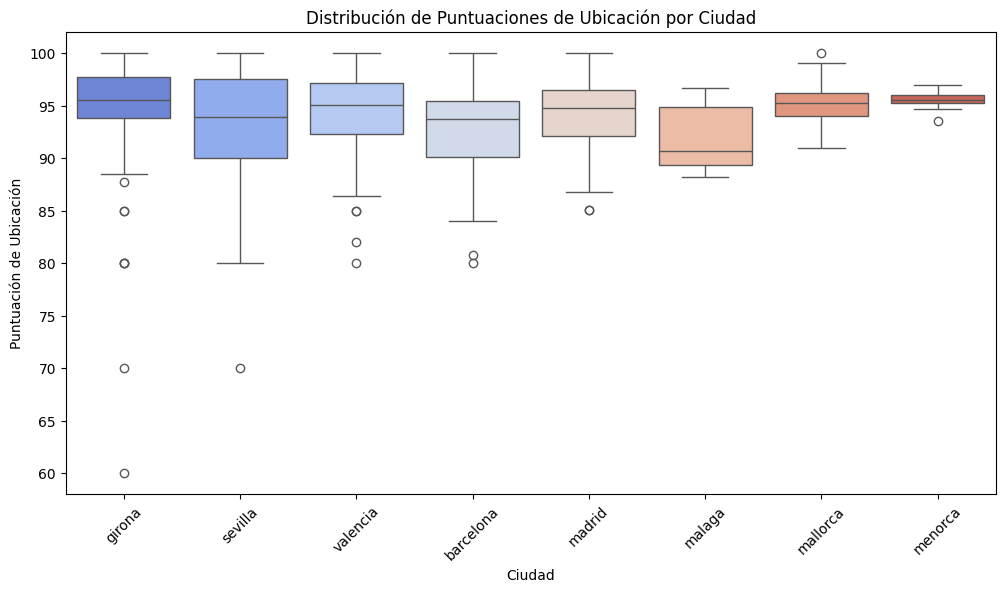

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_table, x="city", y="review_scores_location", palette="coolwarm")

# Configuraci√≥n del gr√°fico
plt.xlabel("Ciudad")
plt.ylabel("Puntuaci√≥n de Ubicaci√≥n")
plt.title("Distribuci√≥n de Puntuaciones de Ubicaci√≥n por Ciudad")
plt.xticks(rotation=45)
plt.show()

# El gr√°fico es un boxplot que muestra la distribuci√≥n de las puntuaciones de ubicaci√≥n (review_scores_location) en distintas ciudades.

# üîπ An√°lisis de la Distribuci√≥n por Ciudad
# 1Ô∏è‚É£ Ciudades con mayor variabilidad en las puntuaciones
# Sevilla, Valencia y Barcelona tienen distribuciones amplias, lo que indica que algunos barrios est√°n bien valorados mientras que otros tienen puntuaciones m√°s bajas.
# Sevilla tiene la mayor dispersi√≥n, con valores desde 60 hasta casi 100, lo que sugiere que hay barrios con ubicaciones muy bien valoradas y otros con puntuaciones bastante malas.

# 2Ô∏è‚É£ Ciudades con menor variabilidad (ubicaciones m√°s homog√©neas)
# Menorca y Mallorca tienen cajas muy estrechas y medianas altas, lo que significa que la mayor√≠a de sus barrios tienen ubicaciones similares y bien valoradas.
# M√°laga y Madrid tambi√©n muestran una distribuci√≥n m√°s compacta, aunque con algunas excepciones en los valores bajos.

# 3Ô∏è‚É£ Ciudades con barrios con las peores ubicaciones (outliers bajos)
# Girona, Sevilla y Valencia tienen barrios con puntuaciones de ubicaci√≥n por debajo de 70, lo que indica que hay algunos barrios percibidos como desfavorables en t√©rminos de localizaci√≥n.
# Barcelona tambi√©n tiene algunos barrios en torno a 80, pero en general sus puntuaciones se mantienen m√°s altas.

# 4Ô∏è‚É£ Puntuaciones m√°ximas y medianas
# La mediana en la mayor√≠a de las ciudades est√° entre 95 y 100, lo que significa que la mayor√≠a de los barrios est√°n bien valorados en t√©rminos de ubicaci√≥n.
# Menorca y Mallorca tienen las puntuaciones m√°s altas de ubicaci√≥n en general, con muy poca variabilidad.

# üìå Conclusiones y Posibles Acciones
# ‚úÖ Sevilla, Valencia y Barcelona tienen la mayor variabilidad en ubicaci√≥n, lo que sugiere que algunos barrios necesitan mejoras en accesibilidad o servicios.
# ‚úÖ Ciudades como Menorca y Mallorca tienen ubicaciones altamente valoradas y homog√©neas, lo que indica menor riesgo en t√©rminos de percepci√≥n de ubicaci√≥n.
# ‚úÖ Ser√≠a interesante cruzar esta informaci√≥n con la cantidad de apartamentos mejorables para ver si las ciudades con mayor variabilidad en ubicaci√≥n tambi√©n tienen m√°s problemas en sus alojamientos.




Gr√°fico de barras: Ciudades con m√°s apartamentos problem√°ticos<br>
Este gr√°fico muestra qu√© ciudades tienen m√°s apartamentos con baja puntuaci√≥n relativa.<br>
Permite ver qu√© ciudades tienen m√°s alojamientos en barrios problem√°ticos.<br>

C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\3630550359.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)
C:\Users\sguti\AppData\Local\Temp\ipykernel_22508\3630550359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)


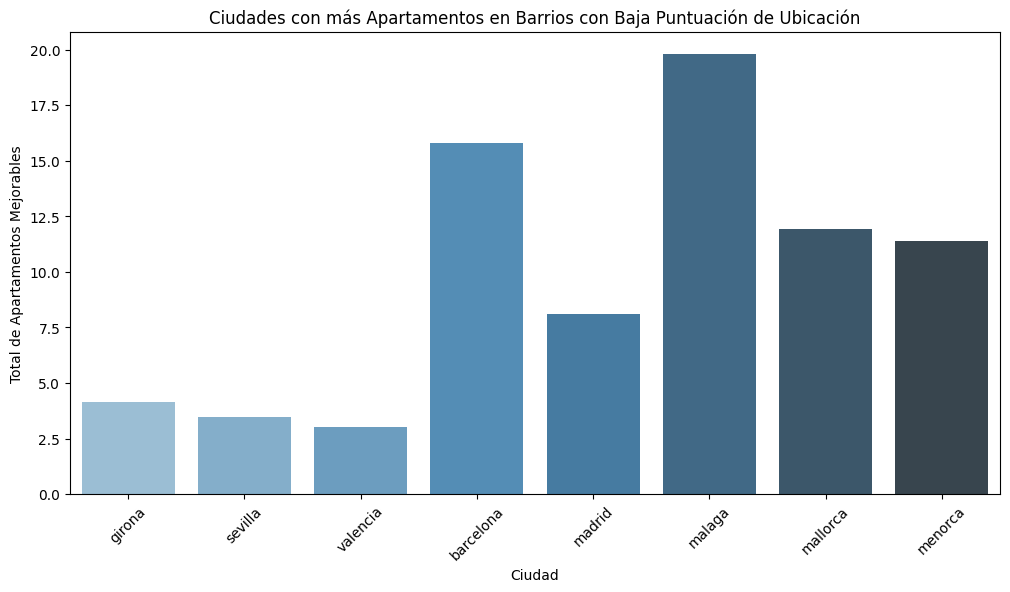

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged_table, x="city", y="apartamento_mejorable", palette="Blues_d", ci=None)

# Configuraci√≥n del gr√°fico
plt.xlabel("Ciudad")
plt.ylabel("Total de Apartamentos Mejorables")
plt.title("Ciudades con m√°s Apartamentos en Barrios con Baja Puntuaci√≥n de Ubicaci√≥n")
plt.xticks(rotation=45)
plt.show()

# üîπ An√°lisis de la Distribuci√≥n por Ciudad
# 1Ô∏è‚É£ Ciudades con m√°s apartamentos problem√°ticos en barrios mal ubicados
# M√°laga lidera con el mayor n√∫mero de apartamentos mejorables, lo que sugiere que en sus barrios con baja puntuaci√≥n de ubicaci√≥n hay m√°s alojamientos con valoraci√≥n negativa.
# Barcelona y Mallorca tambi√©n tienen una cantidad considerable de apartamentos problem√°ticos en barrios con mala ubicaci√≥n.
# Menorca y Madrid est√°n en un nivel intermedio, pero a√∫n con un n√∫mero considerable.

# 2Ô∏è‚É£ Ciudades con menos problemas
# Girona, Sevilla y Valencia tienen los valores m√°s bajos, lo que indica que, aunque puedan tener barrios con mala ubicaci√≥n, la cantidad de apartamentos mal valorados en estos barrios es menor.
# Esto podr√≠a significar que los alojamientos en esas ciudades est√°n mejor adaptados a sus ubicaciones, o que hay menos barrios problem√°ticos en t√©rminos de ubicaci√≥n.

# 3Ô∏è‚É£ Diferencias entre ciudades
# M√°laga tiene una diferencia notable respecto al resto, lo que sugiere que la percepci√≥n de ubicaci√≥n y la calidad de los apartamentos pueden ser m√°s dispares en esa ciudad.
# Barcelona, a pesar de tener una mejor valoraci√≥n de ubicaci√≥n en general, tiene un n√∫mero significativo de apartamentos mejorables en barrios problem√°ticos.

# üìå Conclusiones y Posibles Acciones
# ‚úÖ M√°laga y Barcelona son las ciudades donde m√°s alojamientos en barrios mal ubicados tienen problemas de valoraci√≥n.
# ‚úÖ Las ciudades con menos problemas en este aspecto son Girona, Sevilla y Valencia.
# ‚úÖ Se podr√≠a profundizar en M√°laga y Barcelona para entender qu√© factores contribuyen a esta combinaci√≥n de mala ubicaci√≥n y apartamentos problem√°ticos.
# ‚úÖ Tambi√©n se podr√≠a analizar los precios en estas ciudades para ver si hay relaci√≥n entre valoraci√≥n y costos.


# 5to paso: Propuesta de negocio

Bas√°ndonos en los an√°lisis realizados y la pregunta clave: "¬øQu√© ciudades y barrios muestran un potencial de optimizaci√≥n m√°s grande considerando el n√∫mero de rese√±as y la puntuaci√≥n de la zona?"<br>

Identificamos tres √°reas clave de acci√≥n para mejorar la percepci√≥n y rendimiento de los alojamientos en barrios con baja valoraci√≥n.<br>

1 Estrategia de Posicionamiento y Comunicaci√≥n<br>
Ciudades objetivo:<br>
-M√°laga, Barcelona y Mallorca son las ciudades con mayor n√∫mero de apartamentos en barrios con mala ubicaci√≥n.<br>
-Sevilla, Girona y Valencia presentan menor cantidad de apartamentos problem√°ticos en barrios con mala ubicaci√≥n, lo que sugiere que no requieren tanta intervenci√≥n.<br>

Acciones de marketing: <br>
-Redefinir la comunicaci√≥n de los alojamientos en barrios con baja puntuaci√≥n. <br>
-Enfocar los mensajes en aspectos positivos de la ubicaci√≥n: conexiones de transporte, tranquilidad, proximidad a sitios locales √∫nicos.<br>
-Usar contenido visual (videos, im√°genes profesionales) para mejorar la percepci√≥n.<br>
-Fomentar rese√±as positivas pidiendo feedback a hu√©spedes que hayan tenido experiencias favorables.<br>
-Segmentaci√≥n del P√∫blico Objetivo: Si los barrios con mala ubicaci√≥n tienen precios m√°s bajos, se pueden orientar a viajeros con presupuesto ajustado. Promocionar los alojamientos como opciones para estad√≠as largas o n√≥madas digitales, destacando beneficios como tranquilidad o costo reducido.<br>
-Colaboraciones con influencers y locales: Usar estrategias con influencers de viajes y gastronom√≠a para cambiar la percepci√≥n de estos barrios y tambi√©n Asociaciones con comercios locales para agregar descuentos o experiencias especiales en la zona.<br>


2 Estrategia de Mejoras en la Experiencia del Cliente.<br>
Problem√°tica detectada:<br>
-Los barrios con peor ubicaci√≥n no siempre tienen m√°s alojamientos problem√°ticos.<br>
-Sin embargo, en ciudades como M√°laga y Barcelona, hay una combinaci√≥n de mala ubicaci√≥n y problemas en los alojamientos, lo que impacta negativamente la experiencia del hu√©sped.<br>

Acciones de marketing:<br>
-Optimizaci√≥n del producto en zonas problem√°ticas:<br>
    Incluir check-ins automatizados o transporte gratuito desde puntos clave para reducir la percepci√≥n de mala ubicaci√≥n.<br>
    Mejorar las fotos y descripciones para alinear expectativas con la realidad.<br>
    A√±adir detalles diferenciadores: recomendaciones locales, gu√≠as de barrio, eventos especiales.<br>
-Campa√±as de fidelizaci√≥n en zonas problem√°ticas: Crear ofertas para hu√©spedes recurrentes que hayan valorado positivamente otros alojamientos de la misma cadena o gestor y Promover paquetes con experiencias locales (gastronom√≠a, cultura, movilidad).<br>

3 Estrategia de Pricing y Diferenciaci√≥n<br>
Problema detectado:<br>
-Hay barrios con buena ubicaci√≥n pero con muchos apartamentos mal valorados, lo que sugiere un desajuste entre precio, calidad y expectativas del hu√©sped.<br>
-Es posible que algunos alojamientos est√©n sobrevalorados para la experiencia que ofrecen.<br>

Acciones de marketing:<br>
-Ajuste de precios basado en reputaci√≥n y ubicaci√≥n: Utilizar modelos de pricing din√°mico considerando la puntuaci√≥n de la ubicaci√≥n y la calidad del alojamiento.<br>
-Ofertas exclusivas en barrios con mala reputaci√≥n para incentivar la ocupaci√≥n.<br>
-Diferenciaci√≥n de la oferta en barrios problem√°ticos: Crear categor√≠as dentro de la plataforma: ‚ÄúMejor relaci√≥n calidad-precio‚Äù, ‚ÄúMejor ubicaci√≥n para explorar‚Äù e implementar garant√≠as de satisfacci√≥n o pol√≠ticas de reembolso flexibles en estos barrios.<br>


Conclusi√≥n: ¬øQu√© barrios tienen m√°s potencial de optimizaci√≥n?<br>
Los barrios en M√°laga, Barcelona y Mallorca presentan la mayor oportunidad de optimizaci√≥n debido a la combinaci√≥n de mala ubicaci√≥n percibida y alto n√∫mero de apartamentos con puntuaciones bajas.<br>

Los esfuerzos de marketing deben enfocarse en:<br>
-Mejorar la percepci√≥n de la ubicaci√≥n con estrategias de comunicaci√≥n.<br>
-Optimizar la experiencia del hu√©sped con servicios adicionales.<br>
-Ajustar precios y diferenciar la oferta seg√∫n las necesidades del cliente.<br>

